In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/Assignment1

/content/drive/MyDrive/Assignment1


In [9]:
#acquire data
train_path = 'Training_data'
valid_path = 'Testing_data'

In [15]:
import tensorflow as tf
#defining the model
model = tf.keras.models.Sequential([
    #First convolution
    tf.keras.layers.Conv2D(filters=2,kernel_size=3,activation='sigmoid',input_shape=(124,124,3)),
    tf.keras.layers.MaxPooling2D(pool_size=2,strides=1,padding='valid'),

    #Second convolution
    tf.keras.layers.Conv2D(filters=2,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2,strides=1,padding='valid'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(50,activation='relu'),

    tf.keras.layers.Dense(5,activation='softmax'),
])

In [16]:
#getting the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 122, 122, 2)       56        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 121, 121, 2)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 119, 119, 2)       38        
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 118, 118, 2)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 27848)             0         
                                                                 
 dense_4 (Dense)             (None, 50)               

In [17]:
#compiling the model
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy', 
             optimizer=RMSprop(lr=0.0001),
             metrics=['accuracy']) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [24]:
#train the model from the generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_path, 
                                                   target_size=(124,124), #changed the image size to 224
                                                    batch_size=16,
                                                    class_mode='categorical')
                                                   

#All test images will be rescaled 1./255
test_datagen = ImageDataGenerator(rescale = 1./255)

#apply predefined specification to test the dataset
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size=(224,224), #changed the image size to 224
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 523 images belonging to 5 classes.
Found 128 images belonging to 5 classes.


In [20]:
#training
history = model.fit(train_generator,validation_data=test_set,steps_per_epoch=8,epochs=50)#validation_data is the testing data

Epoch 1/50
8/8 [==============================] - 127s 17s/step - loss: 2.1113 - accuracy: 0.3125 - val_loss: 1.6037 - val_accuracy: 0.2656
Epoch 2/50
8/8 [==============================] - 52s 7s/step - loss: 1.5882 - accuracy: 0.3125 - val_loss: 1.5937 - val_accuracy: 0.2656
Epoch 3/50
8/8 [==============================] - 39s 5s/step - loss: 1.6169 - accuracy: 0.2578 - val_loss: 1.5941 - val_accuracy: 0.2656
Epoch 4/50
8/8 [==============================] - 24s 3s/step - loss: 1.6118 - accuracy: 0.2276 - val_loss: 1.6093 - val_accuracy: 0.1875
Epoch 5/50
8/8 [==============================] - 19s 2s/step - loss: 1.6217 - accuracy: 0.2439 - val_loss: 1.6023 - val_accuracy: 0.2656
Epoch 6/50
8/8 [==============================] - 13s 2s/step - loss: 1.6067 - accuracy: 0.2422 - val_loss: 1.5986 - val_accuracy: 0.2656
Epoch 7/50
8/8 [==============================] - 10s 1s/step - loss: 1.5951 - accuracy: 0.2656 - val_loss: 1.5995 - val_accuracy: 0.2656
Epoch 8/50
8/8 [================

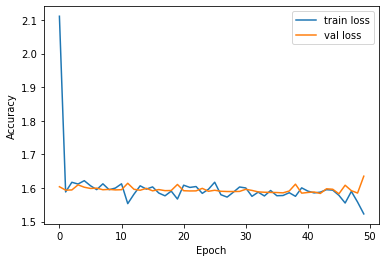

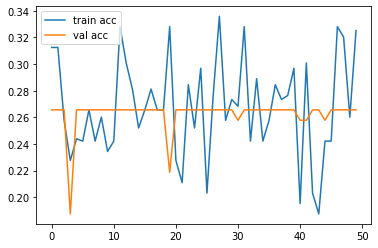

<Figure size 432x288 with 0 Axes>

In [23]:
#plot variation in loss and accuracy
import matplotlib.pyplot as plt

#plot the loss
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('q1_IT20076016_loss')

#plot the accuracy
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('q1_ IT20076016_accuracy')